**Cài đặt thư viện và import**
- pip install pandas
- pip install matplotlib
- pip install openpyxl
- pip install seaborn

In [178]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

## 1: Tiền xử lí dữ liệu
### Bước 1.1: Đọc Data và lập bảng tóm lược dữ liệu

In [179]:
# Lấy dữ liệu gốc từ IT Secondary
file_path = 'IT Secondary.xlsx'
df = pd.read_excel(file_path)

df

,Posted Date,Skill,Company,Workplace,Company Type,Company Industry,Company Size,Country
0,2024-08-29 20:21:20.095,IT Support,Renesas Design Vietnam,At office,IT Product,IT Hardware and Computing,1000+,Japan
1,2024-08-29 20:21:20.095,English,Renesas Design Vietnam,Hybrid,IT Product,IT Hardware and Computing,1000+,Japan
2,2024-08-29 19:21:20.095,ReactJS,NAB Innovation Centre Vietnam,Hybrid,IT Product,Banking,1000+,Australia
3,2024-08-29 19:21:20.095,Java,Renesas Design Vietnam,Hybrid,IT Product,IT Hardware and Computing,1000+,Japan
4,2024-08-29 19:21:20.095,Project Manager,FUJIFILM Business Innovation Việt Nam,At office,IT Product,IT Hardware and Computing,151-300,Vietnam
...,...,...,...,...,...,...,...,...
5821,2024-09-20 21:03:53.213,Java,Vietnam International Bank (VIB),Hybrid,IT Outsourcing,IT Services and IT Consulting,1000+,Vietnam
5822,2024-09-20 21:03:53.213,C++,GEM Corporation,At office,IT Product,Telecommunication,Jan-50,United States
5823,2024-09-19 21:03:53.213,Designer,Viettel Group,At office,IT Product,"AI, Blockchain and Deep Tech Services",51-150,Singapore
5824,2024-09-17 21:03:53.213,AngularJS,Bitcoin Builders,At office,IT Product,Game,Jan-50,Vietnam


In [180]:
# Các hàm
def least_frequent(series):
    freq = series.dropna().value_counts()
    if not freq.empty:
        return freq.idxmin()    
    return None

def summary(df):
    summary = pd.DataFrame({
        'Count (Non-Null)': df.count(),
        'Unique': df.nunique(),
        'Mode (Most Frequent)': df.apply(lambda col: col.mode().iloc[0] if not col.mode().empty else None),
        'Min (Least Frequent)': df.apply(least_frequent),
        'Null Count': df.isnull().sum()
    })    
    return summary

def summary_numeric_column(df):
    stats = {}
    
    for column in df.columns:
        if not pd.api.types.is_numeric_dtype(df[column]):
            continue
        
        count = df[column].count()
        min_val = df[column].min()
        max_val = df[column].max()
        mean_val = df[column].mean()
        median_val = df[column].median()
        mode_val = df[column].mode().iloc[0] if not df[column].mode().empty else None
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.5)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        variance = df[column].var()
        stddev = df[column].std()
        
        stats[column] = {
            'Count': count,
            'Min': min_val,
            'Max': max_val,
            'Mean': mean_val,
            'Median': median_val,
            'Mode': mode_val,
            'Q1': q1,
            'Q2 (Median)': q2,
            'Q3': q3,
            'IQR': iqr,
            'Variance': variance,
            'StdDev': stddev,
        }

    stats_df = pd.DataFrame(stats)
    return stats_df

def drop_column(column, df):
    df_without_column = df.drop(column, axis=1)
    return df_without_column

def frequency(column):
    counts = df[column].value_counts().sort_values(ascending=False)
    result = pd.DataFrame({column: counts.index, 'Count': counts.values})
    return result

def is_occupation(skill):
    for keyword in occupation_keywords: # type: ignore
        if pd.notnull(skill) and keyword.lower() in skill.lower():
            return True
    return False

def is_programming_language(skill):
    for keyword in programming_languages: # type: ignore
        if pd.notnull(skill) and keyword.lower() in skill.lower():
            return True
    return False

def calculate_value(g_value):
    if g_value == '1000+':
        return 1000
    try:
        part1 = g_value.split('-')[0]
        part2 = g_value.split('-')[1]

        value1 = int(part1)
        value2 = int(part2)
        
        return int((value1 + value2) / 2)
    
    except Exception as e:
        return 'N/A'

In [181]:
df_without_date = drop_column('Posted Date', df)
summary(df_without_date)

,Count (Non-Null),Unique,Mode (Most Frequent),Min (Least Frequent),Null Count
Skill,5504,102,Java,Rust,322
Company,5826,685,ABBANK,Fimetech,0
Workplace,5826,18,At office,Da Nang - Ho Chi Minh,0
Company Type,5826,5,IT Product,Headhunt,0
Company Industry,5583,33,IT Services and IT Consulting,Consumer Goods,243
Company Size,5826,7,51-150,501-1000,0
Country,5826,30,Vietnam,Austria,0


### Bước 1.2: Xử lý giá trị Null

In [182]:
# Tần suất của các cột null
frequency('Skill').head()

,Skill,Count
0,Java,313
1,English,271
2,JavaScript,251
3,Python,232
4,ReactJS,211


In [183]:
frequency('Company').head()

,Company,Count
0,ABBANK,114
1,MB Bank,114
2,Bosch Global Software Technologies Company Lim...,78
3,Techcombank,66
4,Viettel Group,63


In [184]:
# Fill các record null bằng top 5 các giá trị có tần suất lớn nhất
top_skill_values = df['Skill'].value_counts().head(5).index.tolist()
top_industry_values = df['Company Industry'].value_counts().head(5).index.tolist()

null_indices = df[df['Skill'].isnull()].index  
for i, idx in enumerate(null_indices):
    df.at[idx, 'Skill'] = top_skill_values[i % len(top_skill_values)]

null_indices = df[df['Company Industry'].isnull()].index
for i, idx in enumerate(null_indices):
    df.at[idx, 'Company Industry'] = top_industry_values[i % len(top_industry_values)]

In [185]:
df_without_date = drop_column('Posted Date', df)
summary(df_without_date)

,Count (Non-Null),Unique,Mode (Most Frequent),Min (Least Frequent),Null Count
Skill,5826,102,Java,Rust,0
Company,5826,685,ABBANK,Fimetech,0
Workplace,5826,18,At office,Da Nang - Ho Chi Minh,0
Company Type,5826,5,IT Product,Headhunt,0
Company Industry,5826,33,IT Services and IT Consulting,Consumer Goods,0
Company Size,5826,7,51-150,501-1000,0
Country,5826,30,Vietnam,Austria,0


### Bước 1.3: Xử lý các record lặp

In [186]:
# Hiển thị số lượng record trùng lặp
duplicates_count = df.duplicated().sum()
print(f"Số lượng bản ghi bị trùng: {duplicates_count}")

Số lượng bản ghi bị trùng: 220


In [187]:
# Loại bỏ các record lặp
df = df.drop_duplicates()
df = df.reset_index(drop=True)
duplicates_count = df.duplicated().sum()
print(f"Số lượng bản ghi bị trùng: {duplicates_count}")

Số lượng bản ghi bị trùng: 0


### Bước 1.4: Xử lý dữ liệu ngoại lai và dữ liệu lỗi

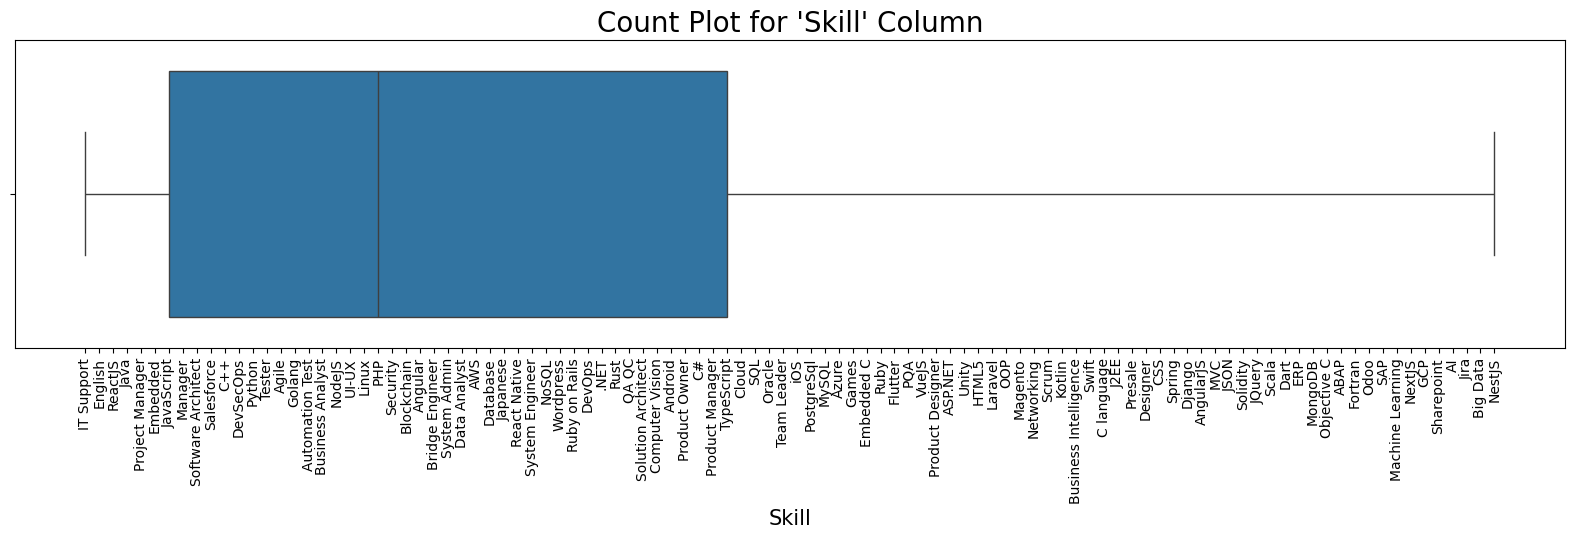

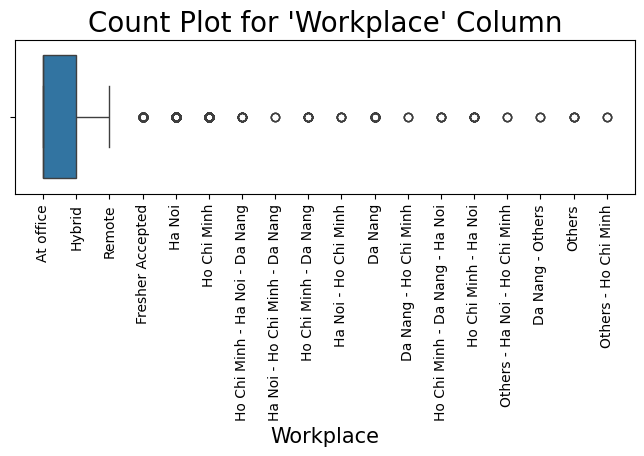

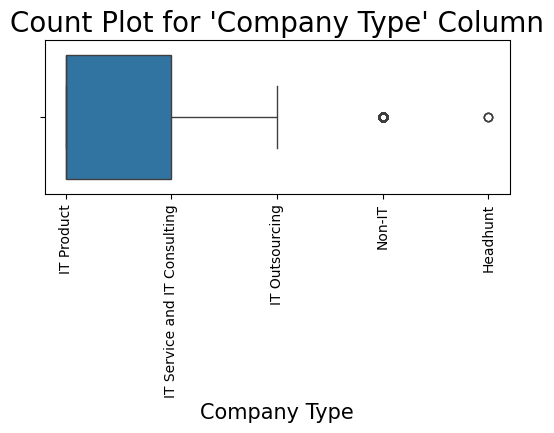

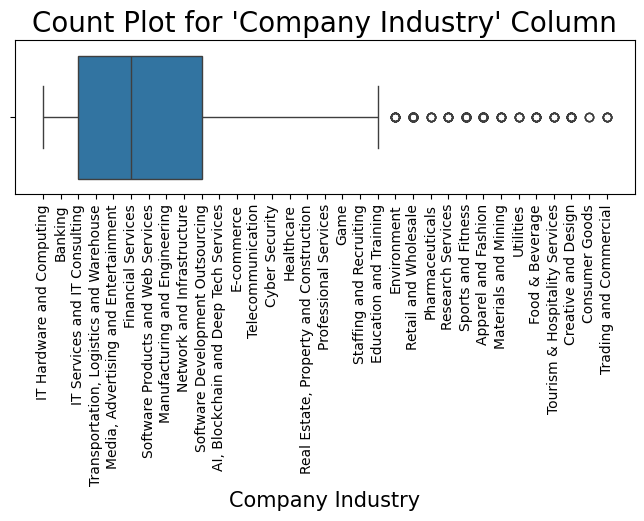

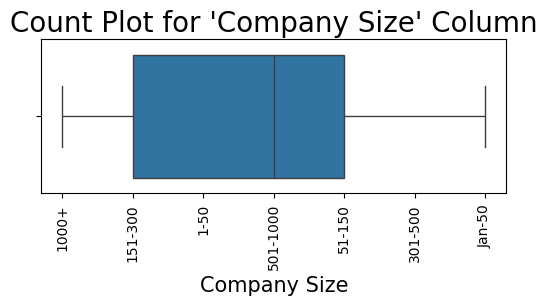

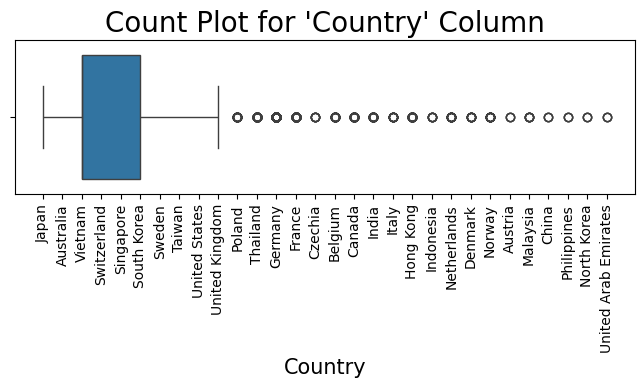

In [188]:
# Vẽ biểu đồ box plot cho các cột
df_without_date = drop_column('Posted Date', df)
for column in df_without_date.columns:
    # top_10 = df_without_date[column].value_counts().head(10).index.tolist()
    # bottom_10 = df_without_date[column].value_counts().tail(10).index.tolist()

    # if len(top_10) < 10:
    #     gap = []
    # else:
    #     gap = ['...'] * 3

    # custom_order = top_10 + gap + bottom_10
    # filtered_df = df_without_date[df_without_date[column].isin(custom_order)]
    if column == 'Company':
        continue       
    elif column == 'Company Type' or column == 'Company Size':
        plt.figure(figsize=(6, 2))
    elif column == 'Company Industry' or column == 'Workplace' or column == 'Country':
        plt.figure(figsize=(8, 2))
    else:
        plt.figure(figsize=(20, 4))

    sns.boxplot(x=df[column])
    plt.title(f"Count Plot for '{column}' Column", fontsize=20)
    plt.xlabel(column, fontsize=15)
    plt.xticks(rotation=90)
    plt.show()

- Nhận thấy cột Company Type có giá trị Headhunt là outliner, vì Headhunt không phải một loại hình công ty, đổi giá trị thành Non-IT.
- Nhận thấy cột Workplace có các giá trị:
    + Fresher Accepted
    + Ho Chi Minh - Da Nang
    + Ho Chi Minh - Ha Noi
    + Ho Chi Minh - Ha Noi - Da Nang
    + Ho Chi Minh - Da Nang - Ha Noi
    + Ha Noi - Ho Chi Minh
    + Da Nang - Ho Chi Minh
    + Others - Ha Noi - Ho Chi Minh
    + Da Nang - Others
    + Ha Noi - Ho Chi Minh - Da Nang
    + Others - Ho Chi Minh <br>

  là outliner, vì Fresher Accepted không là nơi làm việc; các giá trị còn lại gây mơ hồ vì để nhiều địa điểm, vì vậy sẽ đổi giá trị thành Others.
- Nhận thấy cột Company Size có giá trị Jan-50 là giá trị lỗi, vì không cùng dạng với các giá trị còn lại, đổi giá trị thành 1-50

In [189]:
# Loại bỏ outliner cột Company Type
df.loc[df['Company Type'] == 'Headhunt', 'Company Type'] = 'Non-IT'
frequency('Company Type')

,Company Type,Count
0,IT Product,3539
1,IT Service and IT Consulting,1010
2,IT Outsourcing,774
3,Non-IT,283


In [190]:
# Loại bỏ outliner cột Workplace
values_to_replace = [
    'Fresher Accepted', 'Ho Chi Minh - Da Nang', 'Ho Chi Minh - Ha Noi',
    'Ho Chi Minh - Ha Noi - Da Nang', 'Ho Chi Minh - Da Nang - Ha Noi', 
    'Ha Noi - Ho Chi Minh', 'Da Nang - Ho Chi Minh', 'Others - Ha Noi - Ho Chi Minh', 
    'Da Nang - Others', 'Ha Noi - Ho Chi Minh - Da Nang', 'Others - Ho Chi Minh'
]

df.loc[df['Workplace'].isin(values_to_replace), 'Workplace'] = 'Others'
frequency('Workplace')

,Workplace,Count
0,At office,3542
1,Hybrid,1064
2,Ho Chi Minh,466
3,Ha Noi,224
4,Others,153
5,Remote,119
6,Da Nang,38


In [191]:
# Loại bỏ giá trị lỗi cột Company Size
df.loc[df['Company Size'] == 'Jan-50', 'Company Size'] = '1-50'
frequency('Company Size')

,Company Size,Count
0,51-150,1493
1,1000+,1270
2,1-50,1227
3,151-300,741
4,301-500,620
5,501-1000,255


### Bước 1.5: Sinh cột mới

In [192]:
# Đổi tên cột Skill thành Requirement
df.rename(columns={'Skill': 'Requirement'}, inplace=True)
df

,Posted Date,Requirement,Company,Workplace,Company Type,Company Industry,Company Size,Country
0,2024-08-29 20:21:20.095,IT Support,Renesas Design Vietnam,At office,IT Product,IT Hardware and Computing,1000+,Japan
1,2024-08-29 20:21:20.095,English,Renesas Design Vietnam,Hybrid,IT Product,IT Hardware and Computing,1000+,Japan
2,2024-08-29 19:21:20.095,ReactJS,NAB Innovation Centre Vietnam,Hybrid,IT Product,Banking,1000+,Australia
3,2024-08-29 19:21:20.095,Java,Renesas Design Vietnam,Hybrid,IT Product,IT Hardware and Computing,1000+,Japan
4,2024-08-29 19:21:20.095,Project Manager,FUJIFILM Business Innovation Việt Nam,At office,IT Product,IT Hardware and Computing,151-300,Vietnam
...,...,...,...,...,...,...,...,...
5601,2024-09-20 21:03:53.213,Java,Vietnam International Bank (VIB),Hybrid,IT Outsourcing,IT Services and IT Consulting,1000+,Vietnam
5602,2024-09-20 21:03:53.213,C++,GEM Corporation,At office,IT Product,Telecommunication,1-50,United States
5603,2024-09-19 21:03:53.213,Designer,Viettel Group,At office,IT Product,"AI, Blockchain and Deep Tech Services",51-150,Singapore
5604,2024-09-17 21:03:53.213,AngularJS,Bitcoin Builders,At office,IT Product,Game,1-50,Vietnam


In [193]:
# Sinh cột tháng
df = df.copy()
df.loc[:, 'Posted Date'] = pd.to_datetime(df['Posted Date'])
df.loc[:, 'Month'] = df['Posted Date'].dt.month
df = df.loc[:, ['Posted Date', 'Month'] + [col for col in df.columns if col not in ['Posted Date', 'Month']]]

df

,Posted Date,Month,Requirement,Company,Workplace,Company Type,Company Industry,Company Size,Country
0,2024-08-29 20:21:20.095,8,IT Support,Renesas Design Vietnam,At office,IT Product,IT Hardware and Computing,1000+,Japan
1,2024-08-29 20:21:20.095,8,English,Renesas Design Vietnam,Hybrid,IT Product,IT Hardware and Computing,1000+,Japan
2,2024-08-29 19:21:20.095,8,ReactJS,NAB Innovation Centre Vietnam,Hybrid,IT Product,Banking,1000+,Australia
3,2024-08-29 19:21:20.095,8,Java,Renesas Design Vietnam,Hybrid,IT Product,IT Hardware and Computing,1000+,Japan
4,2024-08-29 19:21:20.095,8,Project Manager,FUJIFILM Business Innovation Việt Nam,At office,IT Product,IT Hardware and Computing,151-300,Vietnam
...,...,...,...,...,...,...,...,...,...
5601,2024-09-20 21:03:53.213,9,Java,Vietnam International Bank (VIB),Hybrid,IT Outsourcing,IT Services and IT Consulting,1000+,Vietnam
5602,2024-09-20 21:03:53.213,9,C++,GEM Corporation,At office,IT Product,Telecommunication,1-50,United States
5603,2024-09-19 21:03:53.213,9,Designer,Viettel Group,At office,IT Product,"AI, Blockchain and Deep Tech Services",51-150,Singapore
5604,2024-09-17 21:03:53.213,9,AngularJS,Bitcoin Builders,At office,IT Product,Game,1-50,Vietnam


In [194]:
# Sinh cột Occupation
occupation_keywords = [
    'Manager',       # Project Manager, Product Manager, etc.
    'Analyst',       # Business Analyst, Data Analyst
    'Engineer',      # System Engineer, Bridge Engineer
    'Architect',     # Solution Architect, Software Architect
    'Leader',        # Team Leader
    'Tester',        # Automation Test, Tester
    'Security',      # Security
    'DevOps',        # DevOps, DevSecOps
    'Support',       # IT Support
    'Owner',         # Product Owner
    'Designer',      # Designer, Product Designer
    'Admin',         # System Admin
    'Scrum',         # Scrum
    'Spring',        # Spring (if related to Spring Developer/Lead roles)
    'Leader',        # Appeared under 'Team Leader'
    'Architect',     # Solution Architect, Software Architect
    'Officer',       # Sometimes used in similar contexts
    'DevSecOps'      # Related to security-focused DevOps
]

df['Occupation'] = df['Requirement'].apply(lambda x: x if is_occupation(x) else 'None')

df = df.loc[:, ['Posted Date', 'Month', 'Requirement', 'Occupation'] + [col for col in df.columns if col not in ['Posted Date', 'Month', 'Requirement', 'Occupation']]]

In [195]:
# Sinh cột Programming Language
programming_languages = [
    ".NET", "ABAP", "C language", "C#", "C++", "CSS", "Dart", "Embedded C", 
    "Fortran", "Golang", "HTML5", "Java", "JavaScript", "JSON", "Kotlin", 
    "Objective C", "PHP", "Python", "Ruby", "Rust", "Scala", "SQL", "Swift", 
    "TypeScript", "VB.NET"
]

df['Language'] = df['Requirement'].apply(lambda x: x if is_programming_language(x) else 'None')

df = df.loc[:, ['Posted Date', 'Month', 'Requirement', 'Occupation', 'Language'] + [col for col in df.columns if col not in ['Posted Date', 'Month', 'Requirement', 'Occupation', 'Language']]]


In [206]:
# Sinh cột Skill mới
df['Skill'] = df['Requirement'].apply(lambda x: x if (not is_programming_language(x)) and (not is_occupation(x)) else 'None')
df = df.loc[:, ['Posted Date', 'Month', 'Requirement', 'Occupation', 'Language', 'Skill'] + [col for col in df.columns if col not in ['Posted Date', 'Month', 'Requirement', 'Occupation', 'Language', 'Skill']]]

frequency('Skill')

,Skill,Count
0,None,3226
1,English,325
2,ReactJS,266
3,QA QC,158
4,Agile,154
5,AWS,135
6,NodeJS,131
7,Cloud,119
8,Database,103
9,Automation Test,92


In [197]:
# Chuyển đổi cột Company Size về dạng số
df['Company Size'] = df['Company Size'].apply(calculate_value)

df

,Posted Date,Month,Requirement,Occupation,Language,Skill,Company,Workplace,Company Type,Company Industry,Company Size,Country
0,2024-08-29 20:21:20.095,8,IT Support,IT Support,None,None,Renesas Design Vietnam,At office,IT Product,IT Hardware and Computing,1000,Japan
1,2024-08-29 20:21:20.095,8,English,None,None,English,Renesas Design Vietnam,Hybrid,IT Product,IT Hardware and Computing,1000,Japan
2,2024-08-29 19:21:20.095,8,ReactJS,None,None,ReactJS,NAB Innovation Centre Vietnam,Hybrid,IT Product,Banking,1000,Australia
3,2024-08-29 19:21:20.095,8,Java,None,Java,None,Renesas Design Vietnam,Hybrid,IT Product,IT Hardware and Computing,1000,Japan
4,2024-08-29 19:21:20.095,8,Project Manager,Project Manager,None,None,FUJIFILM Business Innovation Việt Nam,At office,IT Product,IT Hardware and Computing,225,Vietnam
...,...,...,...,...,...,...,...,...,...,...,...,...
5601,2024-09-20 21:03:53.213,9,Java,None,Java,None,Vietnam International Bank (VIB),Hybrid,IT Outsourcing,IT Services and IT Consulting,1000,Vietnam
5602,2024-09-20 21:03:53.213,9,C++,None,C++,None,GEM Corporation,At office,IT Product,Telecommunication,25,United States
5603,2024-09-19 21:03:53.213,9,Designer,Designer,None,None,Viettel Group,At office,IT Product,"AI, Blockchain and Deep Tech Services",100,Singapore
5604,2024-09-17 21:03:53.213,9,AngularJS,None,None,AngularJS,Bitcoin Builders,At office,IT Product,Game,25,Vietnam


## 2: Phân tích mô tả
### Bước 2.1: Lập bảng tóm lược dữ liệu đã được tiền xử lý

In [198]:
# Mô tả tổng quan các cột
df_analysis = drop_column('Posted Date', df)
df_analysis = drop_column('Occupation', df_analysis)
summary(df_analysis)

,Count (Non-Null),Unique,Mode (Most Frequent),Min (Least Frequent),Null Count
Month,5606,3,8,7,0
Requirement,5606,102,Java,Rust,0
Language,5606,30,None,Rust,0
Skill,5606,53,None,Jira,0
Company,5606,685,MB Bank,"NEXTOP CO.,LTD",0
Workplace,5606,7,At office,Da Nang,0
Company Type,5606,4,IT Product,Non-IT,0
Company Industry,5606,33,IT Services and IT Consulting,Consumer Goods,0
Company Size,5606,6,100,750,0
Country,5606,30,Vietnam,Austria,0


In [199]:
# Bảng mô tả các cột dạng số
df_numeric_column = summary_numeric_column(df)
df_numeric_column

,Month,Company Size
Count,5606.000000,5606.000000
Min,7.000000,25.000000
Max,9.000000,1000.000000
Mean,8.197110,366.740992
Median,8.000000,225.000000
Mode,8.000000,100.000000
Q1,8.000000,100.000000
Q2 (Median),8.000000,225.000000
Q3,8.000000,750.000000
IQR,0.000000,650.000000


In [200]:
# Lưu lại dataset đã tiền xử lý
df.to_excel('IT Secondary Preprocessed.xlsx', index=False, sheet_name='Data')

In [217]:
column = 'Language'
frequency(column).iloc[1:].head(10)

,Language,Count
1,Java,354
2,JavaScript,301
3,Python,276
4,SQL,172
5,.NET,126
6,C#,87
7,Golang,75
8,MySQL,73
9,PHP,71
10,TypeScript,68


C:\Users\Needle Fung\AppData\Local\Temp\ipykernel_11004\1372101573.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y=column, x='Count', palette="viridis")


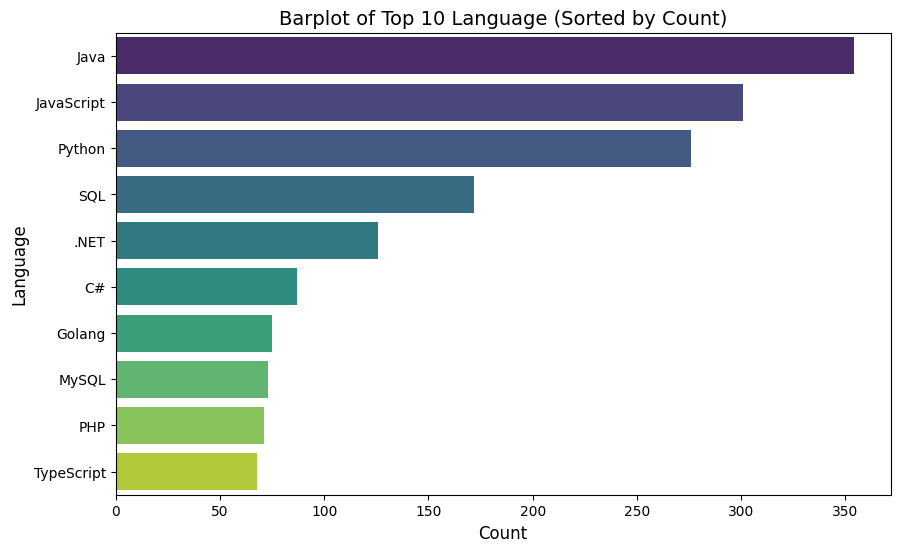

In [218]:
values = df[column].value_counts().iloc[1:]
top_10 = values.head(10).reset_index()
top_10.columns = [column, 'Count']  # Rename the columns

top_10 = top_10.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y=column, x='Count', palette="viridis")

plt.title(f'Barplot of Top 10 {column} (Sorted by Count)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel(column, fontsize=12)

plt.show()


In [203]:
column = 'Occupation'
frequency(column)

,Occupation,Count
0,None,4343
1,Tester,171
2,Business Analyst,123
3,DevOps,118
4,Project Manager,103
5,Spring,99
6,Team Leader,56
7,Solution Architect,56
8,System Engineer,56
9,Scrum,52


C:\Users\Needle Fung\AppData\Local\Temp\ipykernel_11004\455554933.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_values, y=column, x='Count', palette="viridis", hue=None, legend=False)


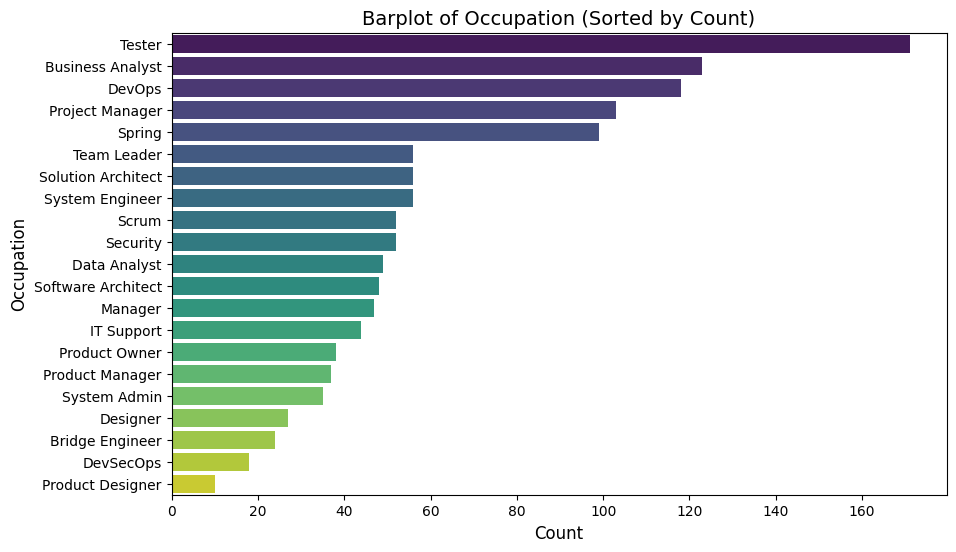

In [204]:
value_counts = df[column].value_counts()

sorted_values = value_counts.reset_index()
sorted_values.columns = [column, 'Count']
sorted_values = sorted_values.iloc[1:]
sorted_values = sorted_values.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_values, y=column, x='Count', palette="viridis", hue=None, legend=False)

# Tùy chỉnh biểu đồ
plt.title(f'Barplot of {column} (Sorted by Count)', fontsize=14)
plt.ylabel(column, fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()